<a href="https://colab.research.google.com/github/mattany/IML/blob/main/problem_set_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [76]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

Draw the axes:

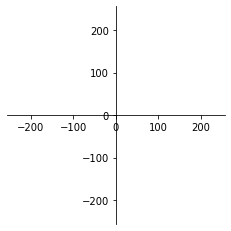

In [77]:
pos_dist_size = 256

def plot_axes():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(-pos_dist_size, pos_dist_size)
    plt.ylim(-pos_dist_size, pos_dist_size)
    plt.gca().set_aspect('equal', adjustable='box')

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

plot_axes()

Draw a random line:

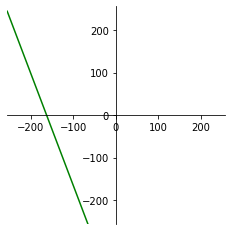

In [78]:
def random_hyperplane(d):
    plane = np.random.randint(2*pos_dist_size,size=(d, d)) - pos_dist_size
    ones = np.empty(d)
    ones.fill(1)
    w = np.linalg.solve(plane, ones)
    w = np.append(-1, w) # Homogenize
    return w

# m, n = random_line()
def plot_line(w, color):
    plot_axes()
    Xs = [-pos_dist_size, pos_dist_size, 0]
    Ys = [
        (-w[0] - w[1] * Xs[0]) / w[2],
        (-w[0] - w[1] * Xs[1]) / w[2],
        (-w[0] - w[1] * Xs[2]) / w[2]
    ]
    plt.plot(Xs, Ys, color)
    
w_star = random_hyperplane(2)
plot_line(w_star)

Generate the inputs:

In [ ]:
def gen_inputs(n, d):
    inputs = np.random.randint(2**9,size=(n, d)) - 2**8
    inputs = np.c_[np.ones(inputs.shape[0]), inputs] # Homogenize
    return inputs

inputs = gen_inputs(20, 2)

Evaluate the inputs and plot the outputs:

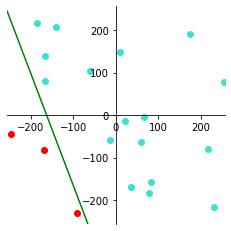

In [79]:
def evaluate_point(w, x):
    return 1 if np.dot(w, x) > 0 else -1

def evaluate_points(inputs, w):
    return [evaluate_point(w, input) for input in inputs]
 
 
outputs = evaluate_points(inputs, w)

def plot_outputs(w, w_star, inputs, outputs):
    plot_line(w, "red")
    plot_line(w_star, "green")
    red_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == 1]
    red_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == 1]
    blue_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == -1 ]
    blue_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == -1 ]

    plt.scatter(red_Xs, red_Ys, color="red")
    plt.scatter(blue_Xs, blue_Ys, color="turquoise")
    plt.show()

plot_outputs(w_star, inputs, outputs)

Converged in 731 updates


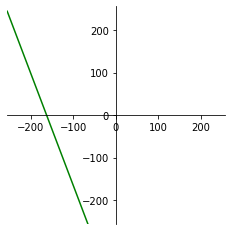

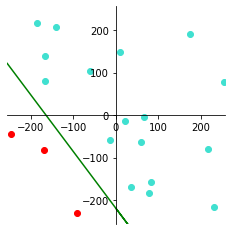

In [81]:
def get_misclassified(w, inputs, outputs):
    for i, inp in enumerate(inputs):
        if outputs[i] != evaluate_point(w, inp):
            return i
    return -1


def perceptron(inputs, outputs):
    w = np.zeros(np.shape(inputs[0]))
    misclassified = get_misclassified(w, inputs, outputs)
    steps = 0
    done = False
    while not done:
        done = True
        for i, inp in enumerate(inputs):
            if outputs[i] != evaluate_point(w, inp):
                done = False
                w += outputs[i] * inp
                steps +=1
    print(f"Converged in {steps} updates")
    plot_line(w_star)
    plot_outputs(w, inputs, outputs)
        
perceptron(inputs, outputs)